In [ ]:
text_part_one = '\tMy name is Celine,\n'
text_part_two = '\tI live in Toronto.\n'
text_part_three =  'I LOOOVE singing.'

print(text_part_one)
print(text_part_two)
print(text_part_three)

	My name is Celine,

	I live in Toronto.

I LOOOVE singing.


In [ ]:
text_part_one = text_part_one.strip()
text_part_two = text_part_two.strip()

print(text_part_one)
print(text_part_two)

My name is Celine,
I live in Toronto.


In [ ]:
text = text_part_one + ' ' + text_part_two + ' ' + text_part_three
print(text)

My name is Celine, I live in Toronto. I LOOOVE singing.


In [ ]:
print(text.startswith('My name') and text.endswith('singing.'))

True


In [ ]:
print('I live in Toronto' in text)

True


In [ ]:
# Let's continue the cleaning of this text to keep the most useful information
# that it contains.

# Let us create a function 'clean_text()' that will clean the text for you. The
# argument of the function will be the text to clean.
def clean_text(x):
  x = x.lower()
  x = x.replace(',','')
  x = x.replace('.','')
  return x

text = clean_text(text)
print(text)

my name is celine i live in toronto i looove singing


In [ ]:
print(text.count('name'))
print(text.count('live'))
print(text.count('love'))

1
1
0


In [ ]:
text = text.replace('looove', 'love')
print(text)

my name is celine i live in toronto i love singing


In [ ]:
import re
def clean_stopwords(y):
 # remove 'my '. Be careful: the text starts with 'my' and is followed by a whitespace ('\s')
 y = re.sub('my\s','',y)
 y = re.sub('is\s','',y)
 y = re.sub('i\s','', y)
 y = re.sub('in\s', '',y)
 return y

text = clean_stopwords(text)
print(text)


My name Celine, I live Toronto. I LOOOVE singing. My phone number 111-111-1111.


In [ ]:

def extract_info(g):
  global name, residence, hobby
  token = g.split(' ')

  # Store index of 'name', 'live', 'love' as 'ind_name', 'ind_live' and 'ind_love', respectively.

  ind_name = token.index('name')
  ind_live = token.index('live')
  ind_love = token.index('love')

  # We know that 'celine', 'toronto' and 'singing' are right after 'name', 'live' and 'love'.
  # You have just stored the indices of 'name', 'live' and 'love'.

  name = token[ind_name + 1]
  residence = token[ind_live + 1]
  hobby = token[ind_love + 1]

  print('Name:', name)
  print('Residence:', residence)
  print('Hobby:', hobby)

print(extract_info(text))





Name: celine
Residence: toronto
Hobby: singing
None


In [ ]:
# Use Pandas to create the DataFrame.
import pandas as pd

df = pd.DataFrame({'Name': [name], 'Residence': [residence], 'Hobby': [hobby]})
df

,Name,Residence,Hobby
0,celine,toronto,singing


In [ ]:
# Let's add more data from other individuals now.
text_two = 'My name is Hossam, I live in Barrie. I love hiking'
text_three = 'My name is Darren, I live in Markham. I love painting'
text_four = 'My name is Vincent, I live in Scarborough. I love hiking'
text_five = 'My name is Oceane, I live in toronto. I love reading'
text_six = 'My name is Myra, I live in Mississauga. I love hiking'
text_seven = 'My name is Emily, I live in Toronto. I love hiking'

# Include these texts into a list call list_of_text.
list_of_text = [text_two, text_three, text_four, text_five, text_six, text_seven]

print(len(list_of_text))
print(list_of_text)

6
['My name is Hossam, I live in Barrie. I love hiking', 'My name is Darren, I live in Markham. I love painting', 'My name is Vincent, I live in Scarborough. I love hiking', 'My name is Oceane, I live in toronto. I love reading', 'My name is Myra, I live in Mississauga. I love hiking', 'My name is Emily, I live in Toronto. I love hiking']


In [ ]:
# We are now going to create a for statement to iterate over list_of_text to
# 1) clean the text using the function you created clean_text().
# 2) extract the key insights using extract_info().
# 3) create a DataFrame called 'df1'.
# 4) concatenate the new information to 'df'.
for x in list_of_text:
  x = clean_text(x)
  x = clean_stopwords(x)
  extract_info(x)
  df1 = pd.DataFrame({'Name':[name], 'Residence': [residence], 'Hobby':[hobby]})
  df= pd.concat([df,df1], ignore_index=True)

print(df)






Name: hossam
Residence: barrie
Hobby: hiking
Name: darren
Residence: markham
Hobby: painting
Name: vincent
Residence: scarborough
Hobby: hiking
Name: oceane
Residence: toronto
Hobby: reading
Name: myra
Residence: mississauga
Hobby: hiking
Name: emily
Residence: toronto
Hobby: hiking
      Name    Residence     Hobby
0   celine      toronto   singing
1   hossam       barrie    hiking
2   darren      markham  painting
3  vincent  scarborough    hiking
4   oceane      toronto   reading
5     myra  mississauga    hiking
6    emily      toronto    hiking


In [ ]:
text = 'My name is Celine, I live in Toronto. I LOOOVE singing. My phone number is 111-111-1111.'
text_two = 'My name is Hossam, I live in Barrie. I love hiking. My cellphone number is 222-222-2222.'
text_three = 'My name is Darren, I live in Markham. I love painting. You can reach out to me on this number 333-333-3333.'
text_four = 'My name is Vincent, I live in Scarborough. I love hiking. 444-444-4444.'
text_five = 'My name is Oceane, I live in toronto. I love reading. My number is 555-555-5555.'
text_six = 'My name is Myra, I live in Mississauga. I love hiking. 666-666-6666.'
text_seven = 'My name is Emily, I live in Toronto. I love hiking. You can reach out to me on this number 777-777-7777 on Tuesdays only.'

list_of_text = [text, text_two, text_three, text_four, text_five, text_six, text_seven]

# We want to include this new data in our DataFrame df. But this time, the data is messier.

# However, we can see that the phone numbers follow the same pattern:
# 3 digits + 1 hyphen + 3 digits + 1 hyphen + 4 digits.

# Use a for statement to iterate over each text in 'list_of_text' to create a list that contains all the phone numbers.
# Call the list 'list_phone_numbers'.

# Create the empty list called  'list_phone_numbers'.
list_phone_numbers = []

for x in list_of_text:
  phone = re.search('\d{3}-\d{3}-\d{4}', x ).group()
  list_phone_numbers.append(phone)

df['Phone'] = list_phone_numbers

print(df)


      Name    Residence     Hobby         Phone
0   celine      toronto   singing  111-111-1111
1   hossam       barrie    hiking  222-222-2222
2   darren      markham  painting  333-333-3333
3  vincent  scarborough    hiking  444-444-4444
4   oceane      toronto   reading  555-555-5555
5     myra  mississauga    hiking  666-666-6666
6    emily      toronto    hiking  777-777-7777


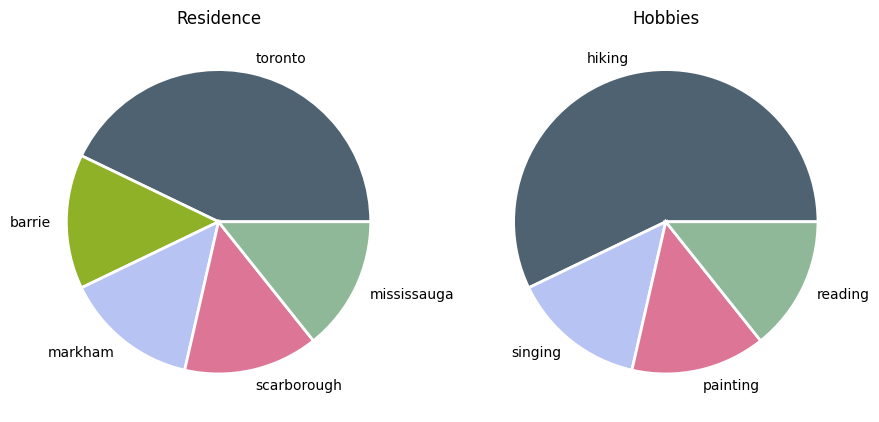

In [ ]:
# Use matplotlib to plot two pie charts on the variables 'Residence' and 'Hobby'.
# Import the library as plt.
import matplotlib.pyplot as plt

# Initialize the figure.
fig = plt.figure(figsize=(9, 5))

# Create the plot locations.
# We want the plots to be next to each other in one row.
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

colors_pie_1 = ['#4F6272', '#8EB127', '#B7C3F3', '#DD7596', '#8EB897']
colors_pie_2 = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']

ax1.pie(x = list(df['Residence'].value_counts()),
labels=df['Residence'].value_counts().index,
colors=colors_pie_1,
      # Set the width of the wedge border lines equal to 2.
        # Set the edge colour to 'white'.
wedgeprops={'linewidth': 2
, 'edgecolor':'white'})

ax1.set_title('Residence')

ax2.pie(x=list(df['Hobby'].value_counts()),
        labels=df['Hobby'].value_counts().index,
        colors=colors_pie_2,
        wedgeprops={'linewidth':2, 'edgecolor':'white'})

ax2.set_title('Hobbies')

plt.tight_layout()

plt.show()